<a href="https://colab.research.google.com/github/elsaprelia/MACHINE-LEARNING/blob/main/minggu_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA : ELSA APRELIANI SUTRISNO

NIM  : 2241717010

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from skimage import io

## Studi Kasus 2: Kompresi Citra

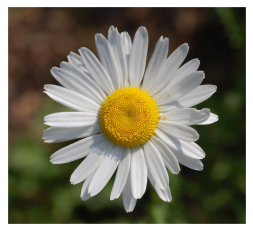

In [ ]:
img = io.imread('bunga.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(img);

In [ ]:
img.shape

(1024, 1126, 3)

In [ ]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

ValueError: ignored

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

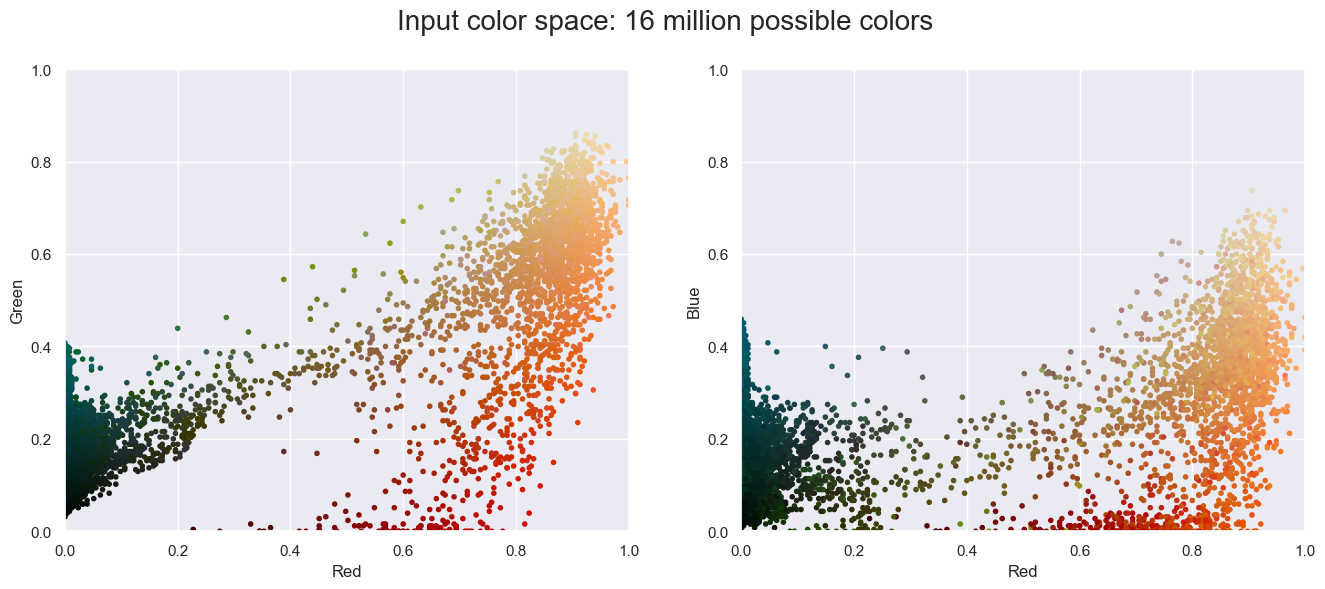

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

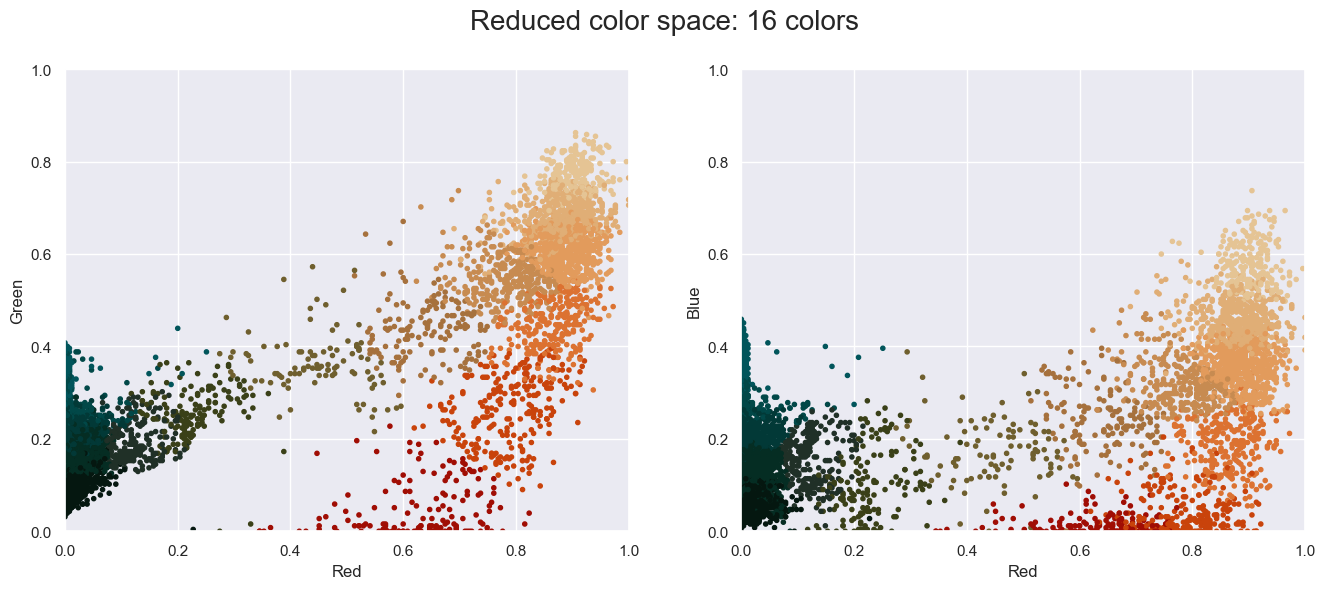

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

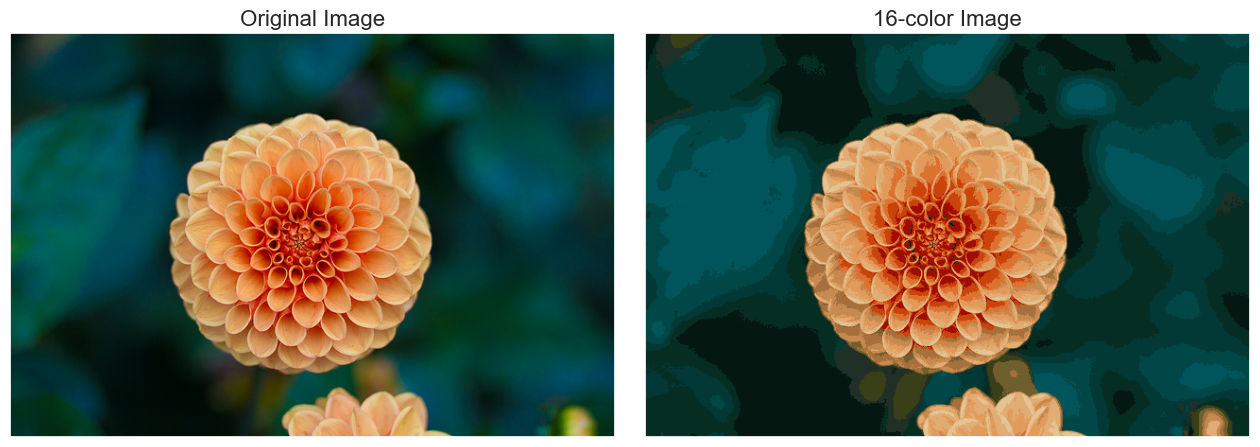

In [ ]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

## Elbow Method - Within-Cluster-Sum of Squared Errors (WSS)

In [ ]:
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
   
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

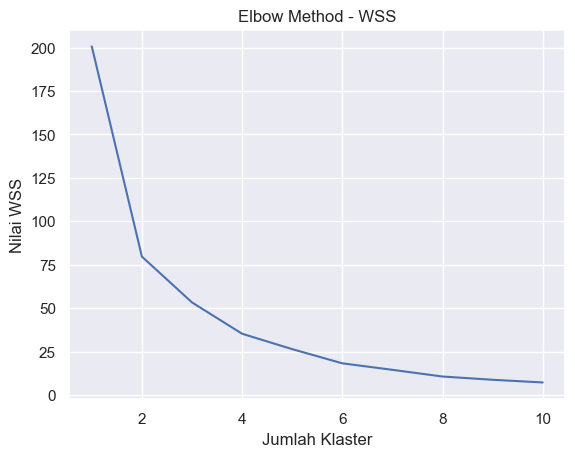

In [ ]:
ycall = [1,2,3,4,5,6,7,8,9,10]

yWSS = calculate_WSS(X, 10)

plt.plot(ycall, yWSS)
plt.title('Elbow Method - WSS')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Nilai WSS')
plt.show()

## The Silhouette Method

In [ ]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

sil

[0.49215648268306905,
 0.42409113173123036,
 0.44709257821561577,
 0.4808239021590633,
 0.500233567081724,
 0.5175345570564969,
 0.5251221741992957,
 0.5251158992069935,
 0.5127659328274448]

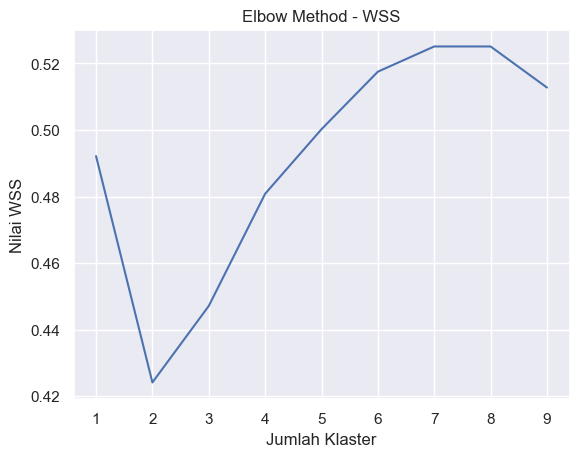

In [ ]:
xsil = [1,2,3,4,5,6,7,8,9]

plt.plot(xsil, sil)
plt.title('Elbow Method - WSS')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Nilai WSS')
plt.show()